In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dataset = np.load('../data/cstr_rawdata.npy')

In [16]:
X = dataset[:, :-4]
class_label = dataset[:, -4]
domain_label = dataset[:, -3]
parameter_noise = dataset[:, -2]
reaction_order = dataset[:, -1]

In [17]:
print(X.shape)
print(class_label.shape)
print(domain_label.shape)
print(parameter_noise.shape)
print(reaction_order.shape)

(2860, 1400)
(2860,)
(2860,)
(2860,)
(2860,)


In [18]:
np.unique(domain_label, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6.]),
 array([1300,  260,  260,  260,  260,  260,  260]))

In [19]:
np.unique(reaction_order, return_counts=True)

(array([0.5, 1. , 1.5, 2. ]), array([ 260, 2080,  260,  260]))

In [20]:
print('-' * 49)
print("|{:^15}|{:^15}|{:^15}|".format('Domain Label', "N", "ϵ"))
print('-' * 49)
for domain in np.unique(domain_label):
    ind = np.where(domain_label == domain)[0]
    print("|{:^15}|{:^15}|{:^15}|".format(domain, np.unique(reaction_order[ind]).item(), np.unique(parameter_noise[ind]).item()))
print('-' * 49)


-------------------------------------------------
| Domain Label  |       N       |       ϵ       |
-------------------------------------------------
|      0.0      |      1.0      |      0.0      |
|      1.0      |      1.0      |      0.1      |
|      2.0      |      1.0      |     0.15      |
|      3.0      |      1.0      |      0.2      |
|      4.0      |      0.5      |     0.15      |
|      5.0      |      1.5      |     0.15      |
|      6.0      |      2.0      |     0.15      |
-------------------------------------------------


In [21]:
np.unique(class_label, return_counts=True)


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220]))

### Data Visualisation

In [36]:
def plot_data(label):
    ind_s = np.where(class_label == label)[0][0]
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    t = np.arange(0, 200, 1)

    axes[0, 0].plot(t, X[ind_s, :200])
    axes[0, 0].set_ylabel('$C_{i}$ [mol/L]')
    axes[0, 0].set_xlabel('$t$ [min]')

    axes[0, 1].plot(t, X[ind_s, 200:400])
    axes[0, 1].set_ylabel('$T_{i}$ [K]')
    axes[0, 1].set_xlabel('$t$ [min]')

    axes[0, 2].plot(t, X[ind_s, 400:600])
    axes[0, 2].set_ylabel('$T_{ci}$ [K]')
    axes[0, 2].set_xlabel('$t$ [min]')

    axes[1, 0].plot(t, X[ind_s, 600: 800])
    axes[1, 0].set_ylabel('$C$ [mol/L]')
    axes[1, 0].set_xlabel('$t$ [min]')

    axes[1, 1].plot(t, X[ind_s, 1000: 1200])
    axes[1, 1].set_ylabel('$T$ [K]')
    axes[1, 1].set_xlabel('$t$ [min]')

    axes[1, 2].plot(t, X[ind_s, 1200: 1400])
    axes[1, 2].set_ylabel('$T_{c}$ [K]')
    axes[1, 2].set_xlabel('$t$ [min]')

    axes[2, 1].plot(t, X[ind_s, 800: 1000])
    axes[2, 1].set_ylabel('$C_{B}$ [mol/L]')
    axes[2, 1].set_xlabel('$t$ [min]')

    fig.delaxes(axes[2, 0])
    fig.delaxes(axes[2, 2])
    plt.tight_layout()

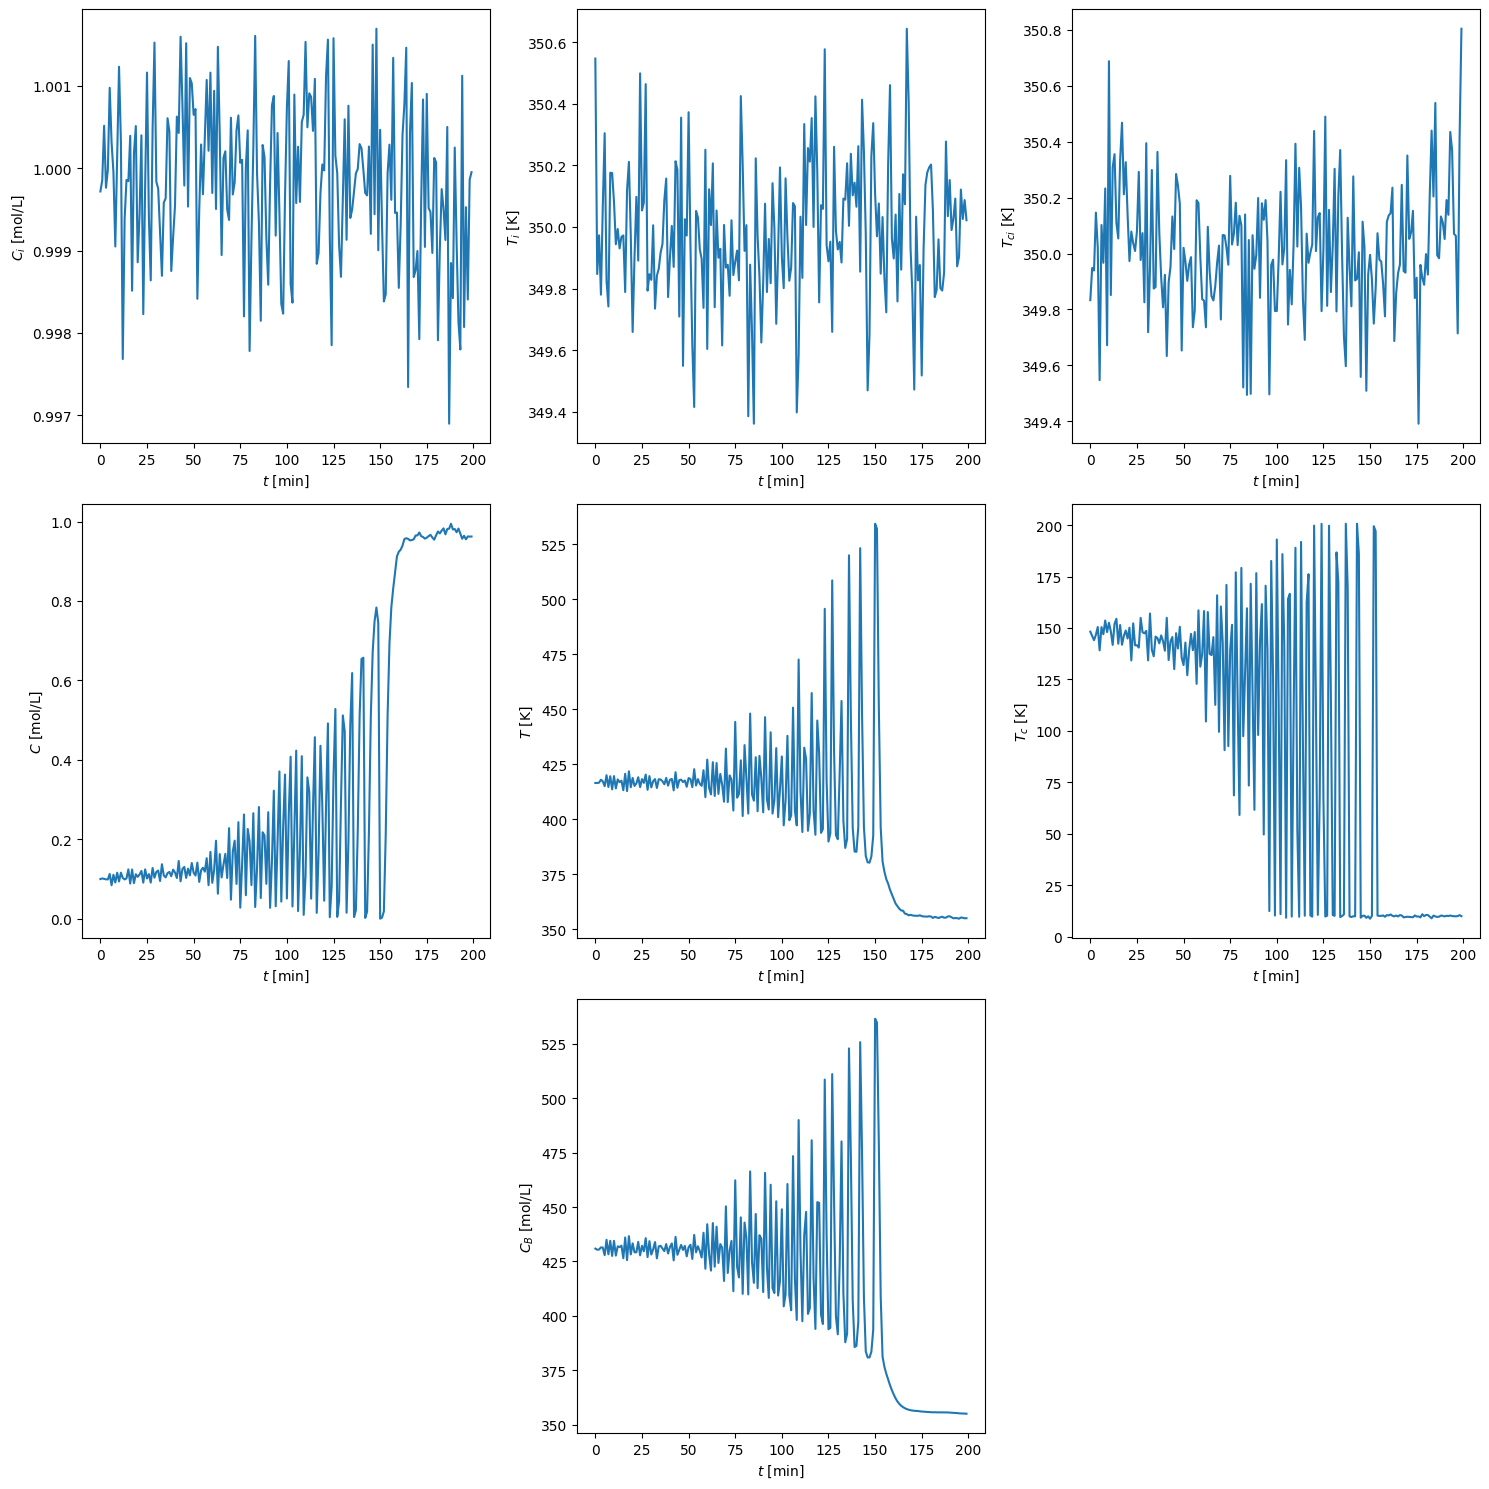

In [37]:
plot_data(0)

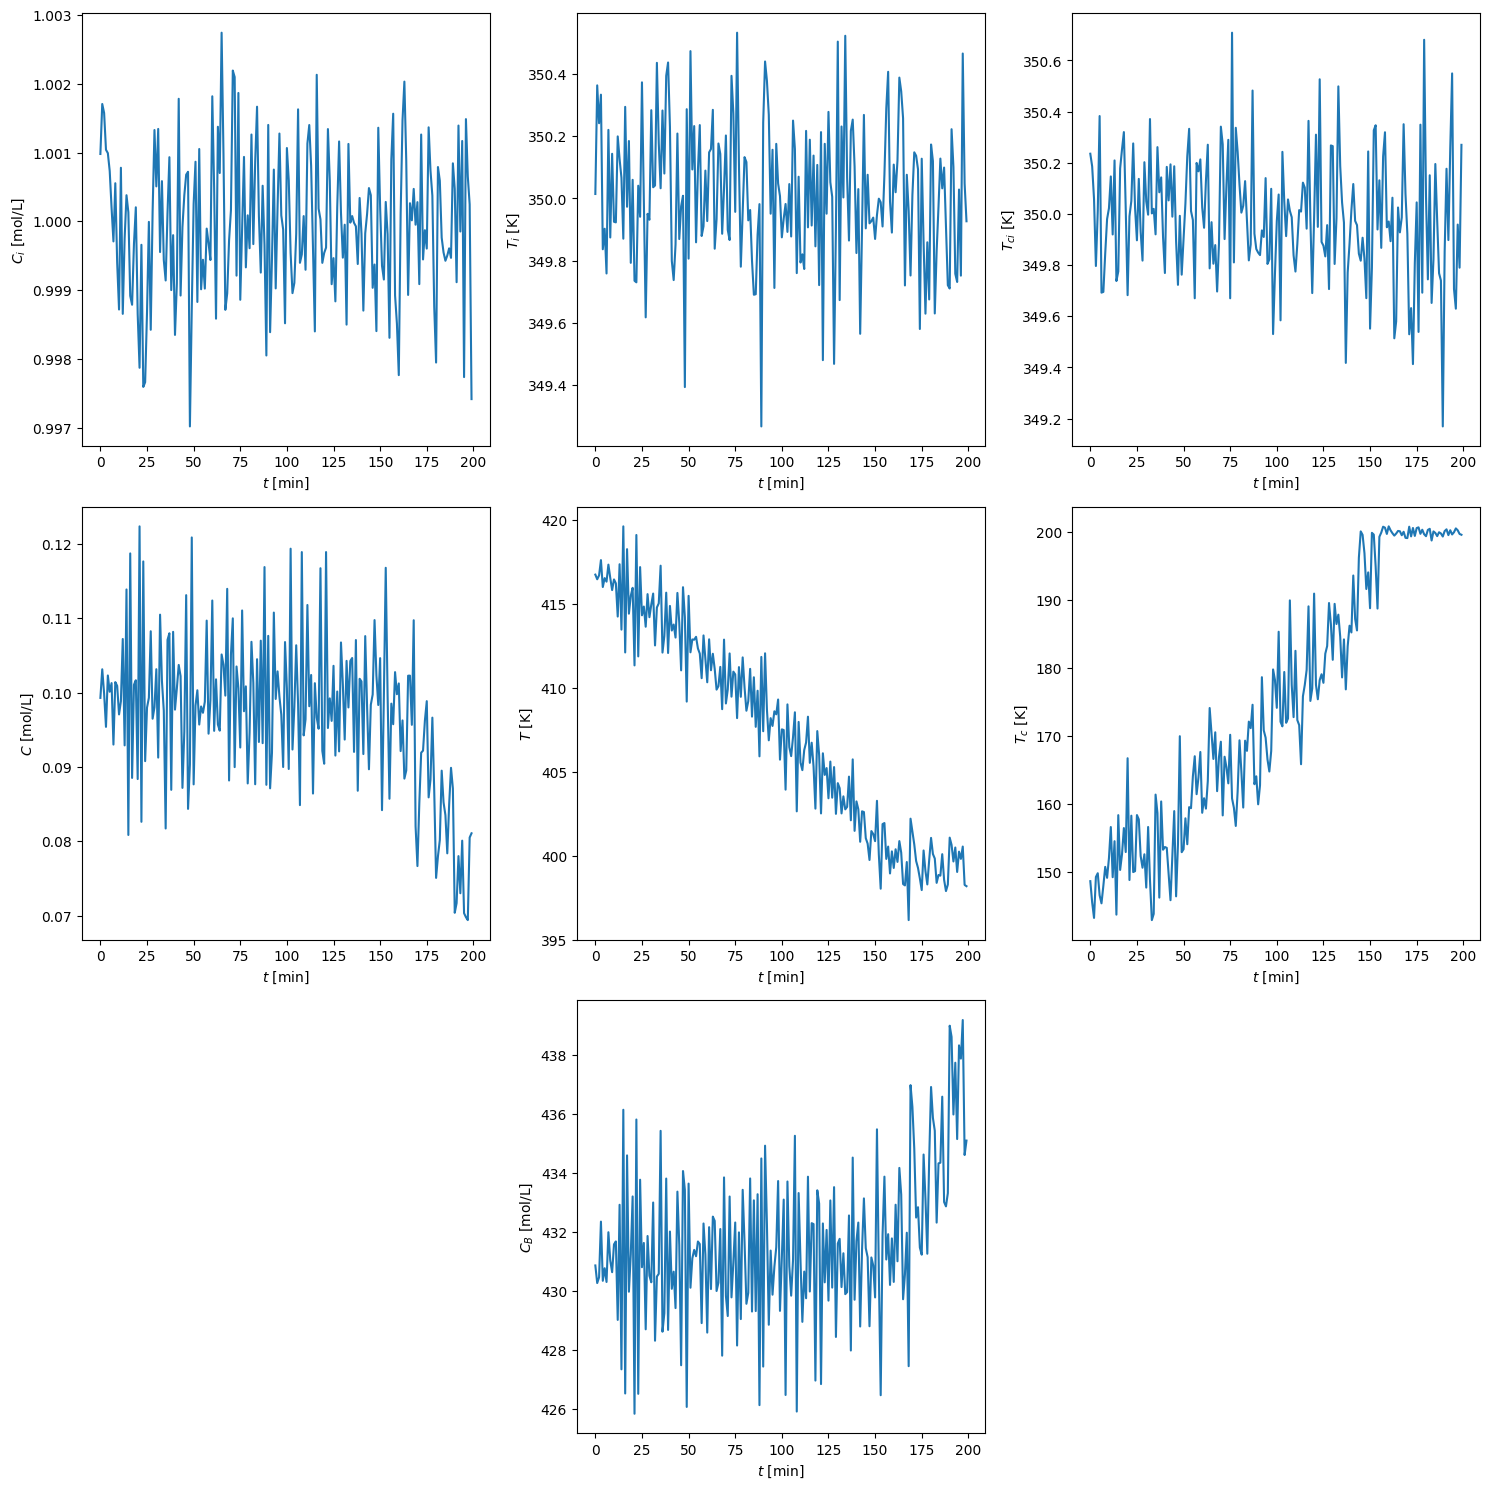

In [38]:
plot_data(1)

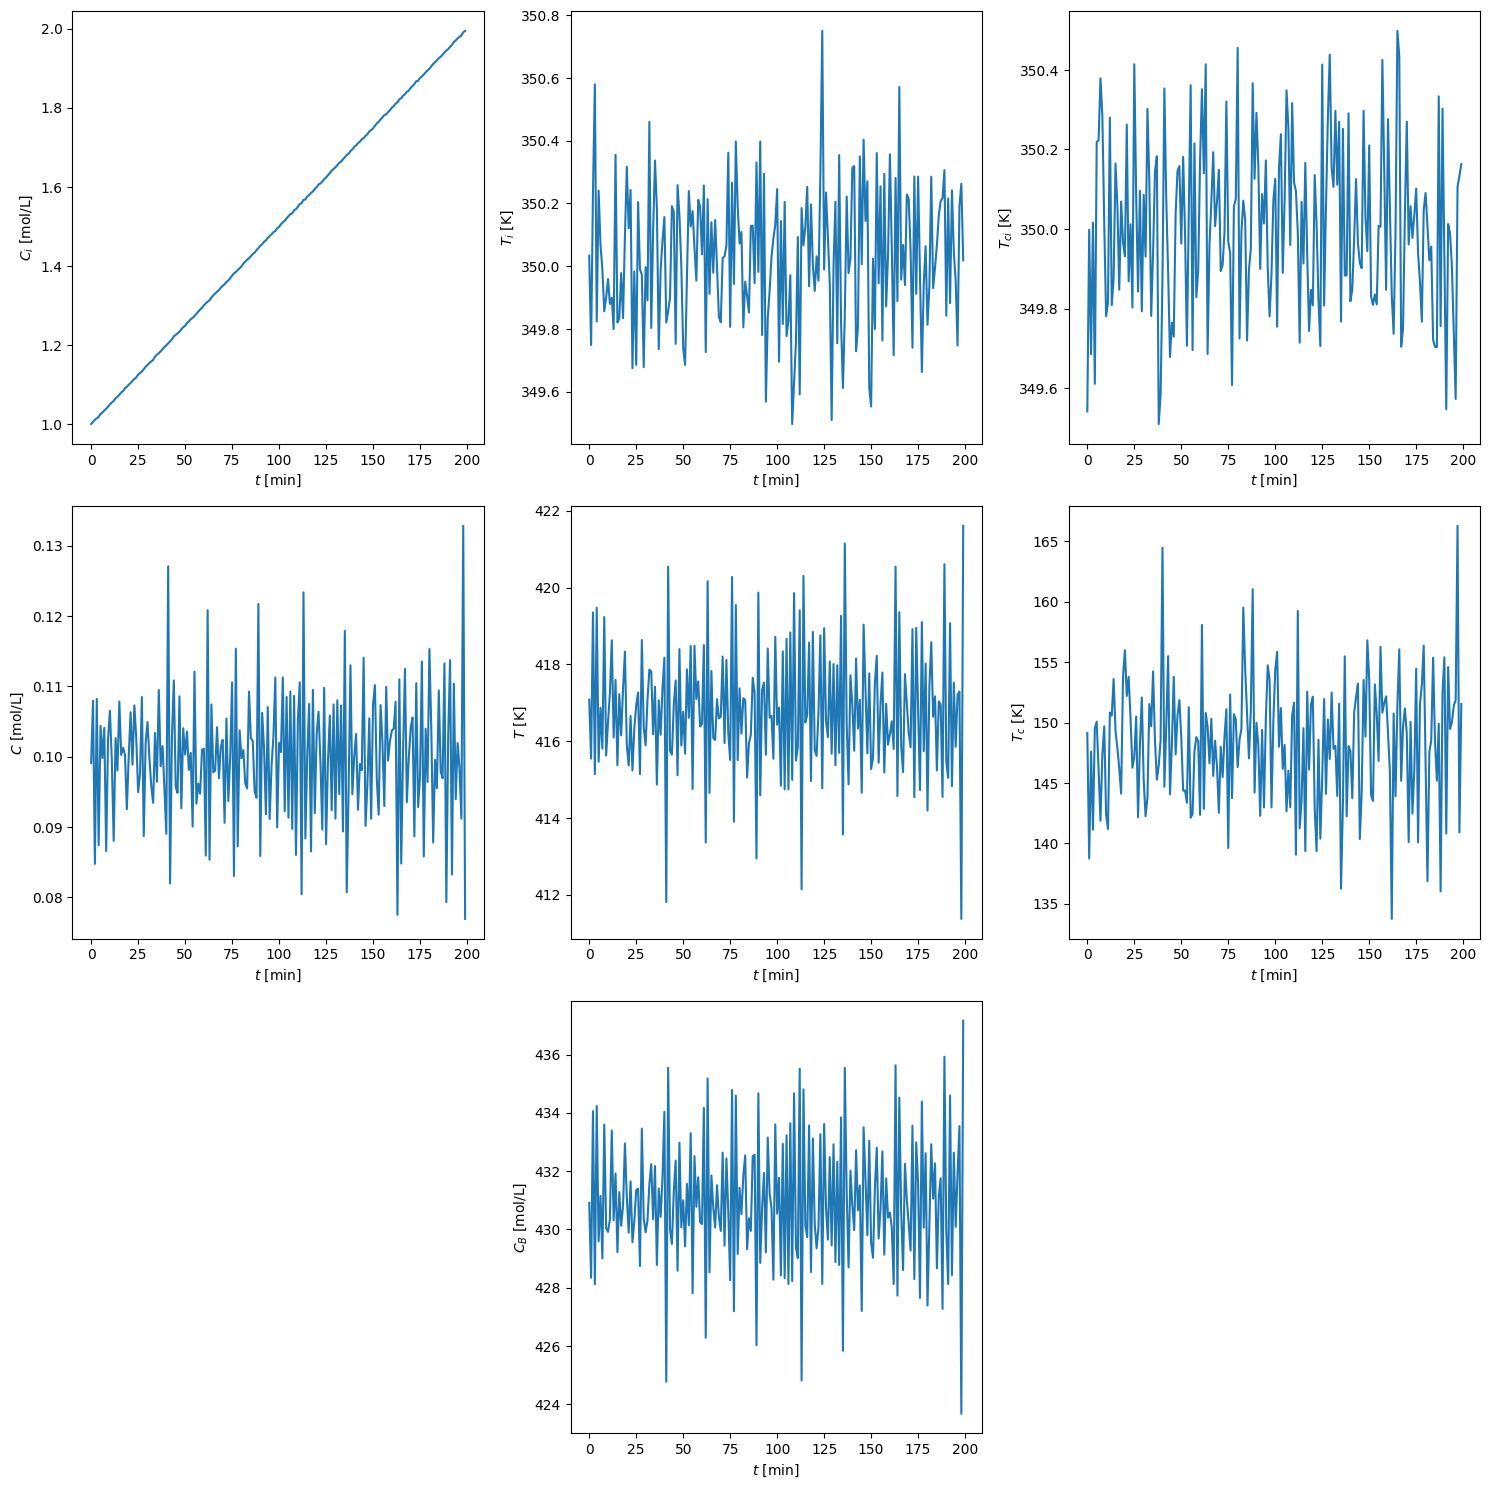

In [49]:
plot_data(2)

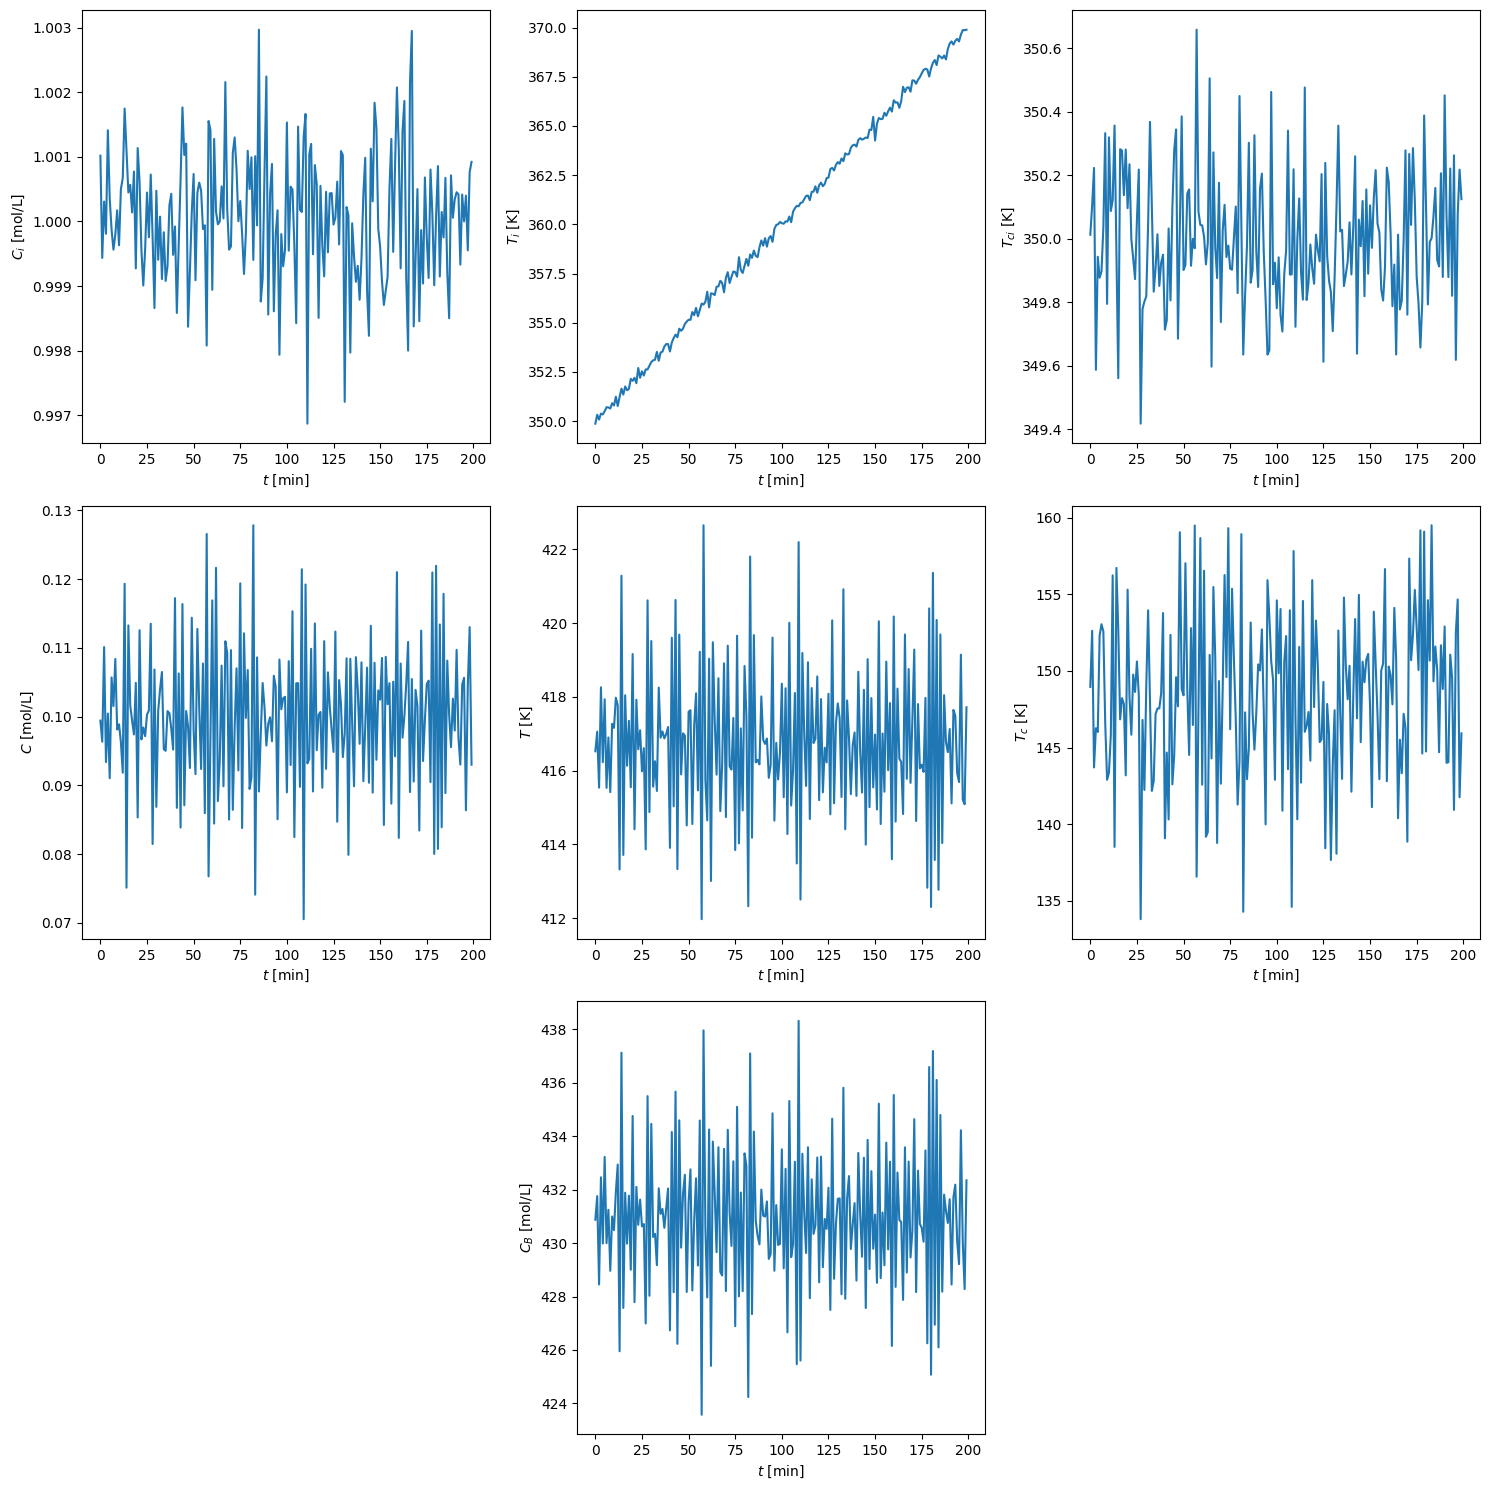

In [40]:
plot_data(3)

/tmp/ipykernel_2381817/4283087385.py:2: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  ind_s = np.where(class_label == class_label)[0][0]


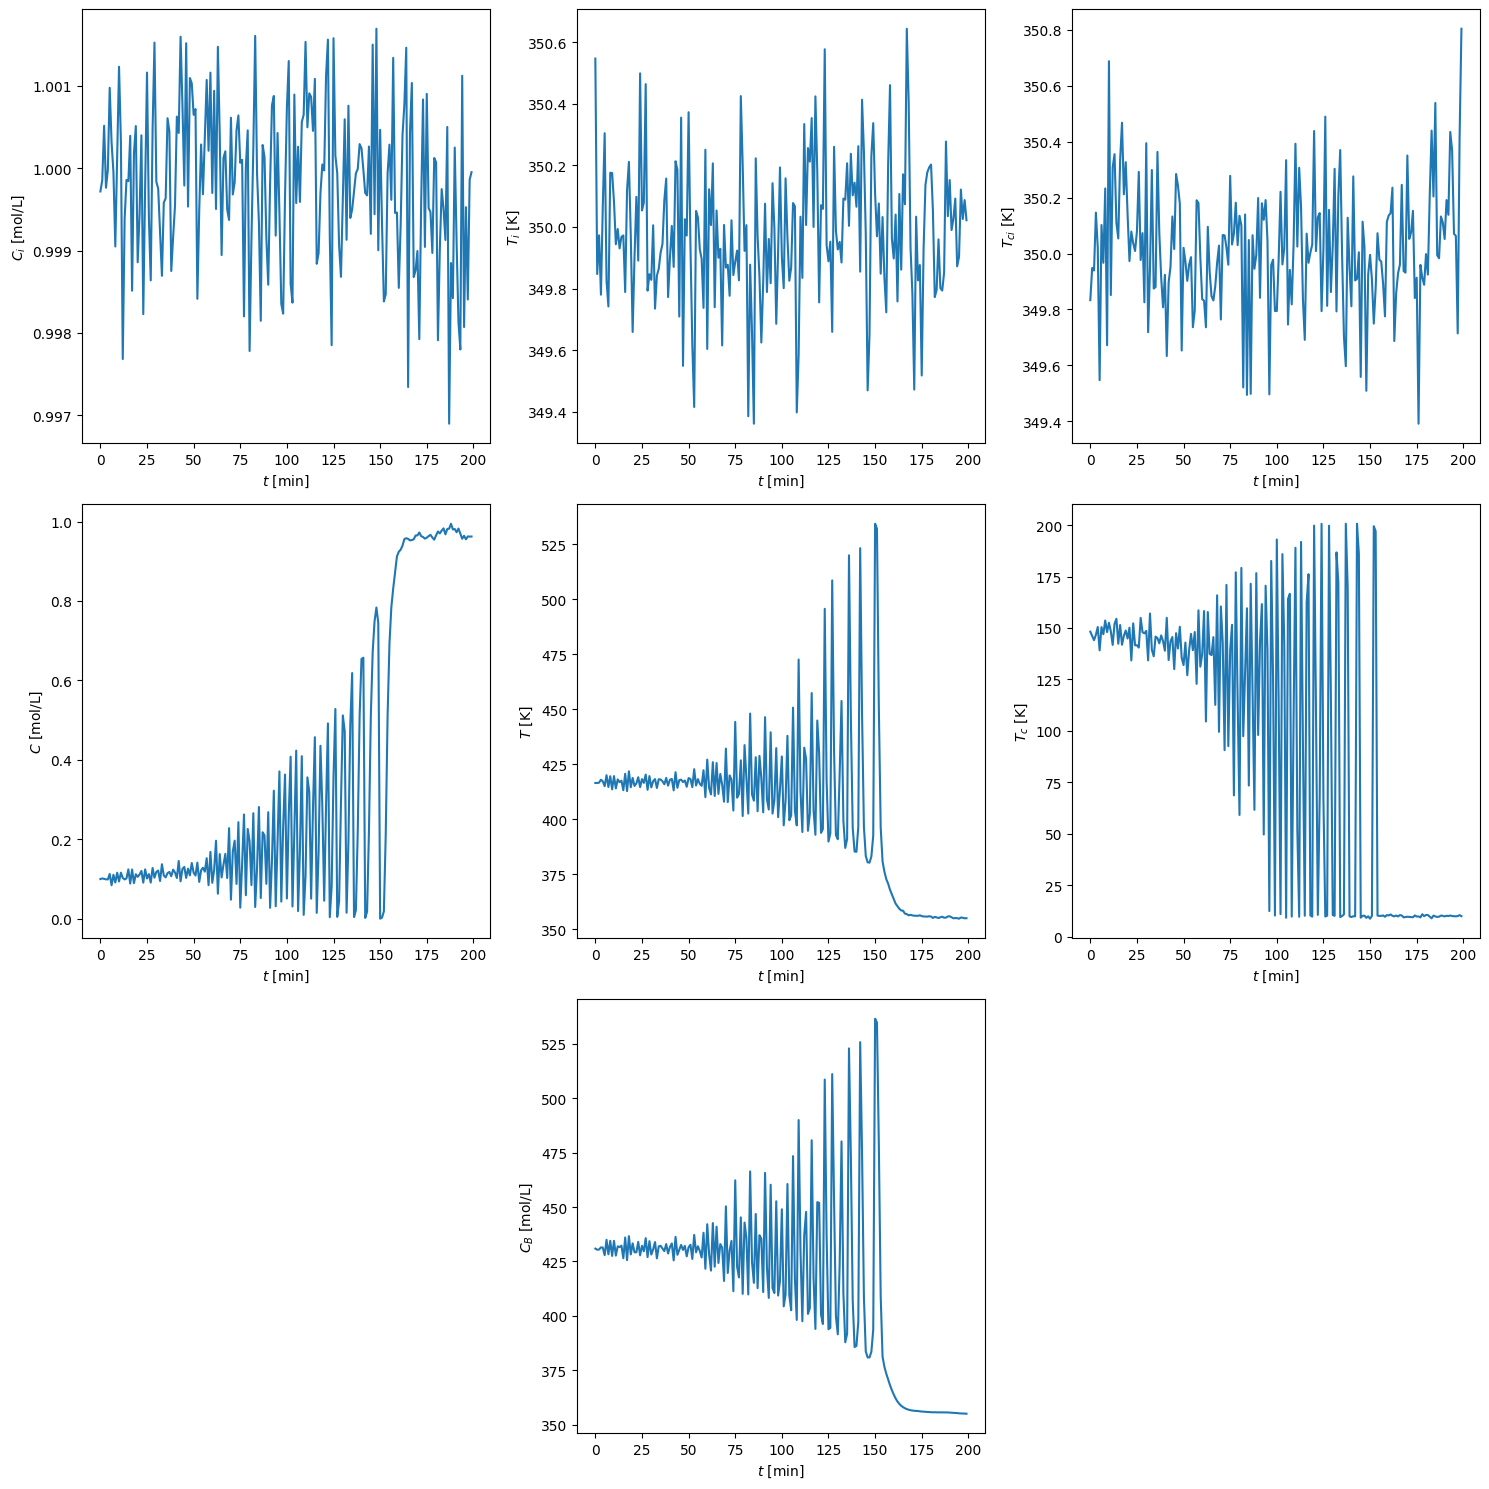

In [27]:
plot_data(4)

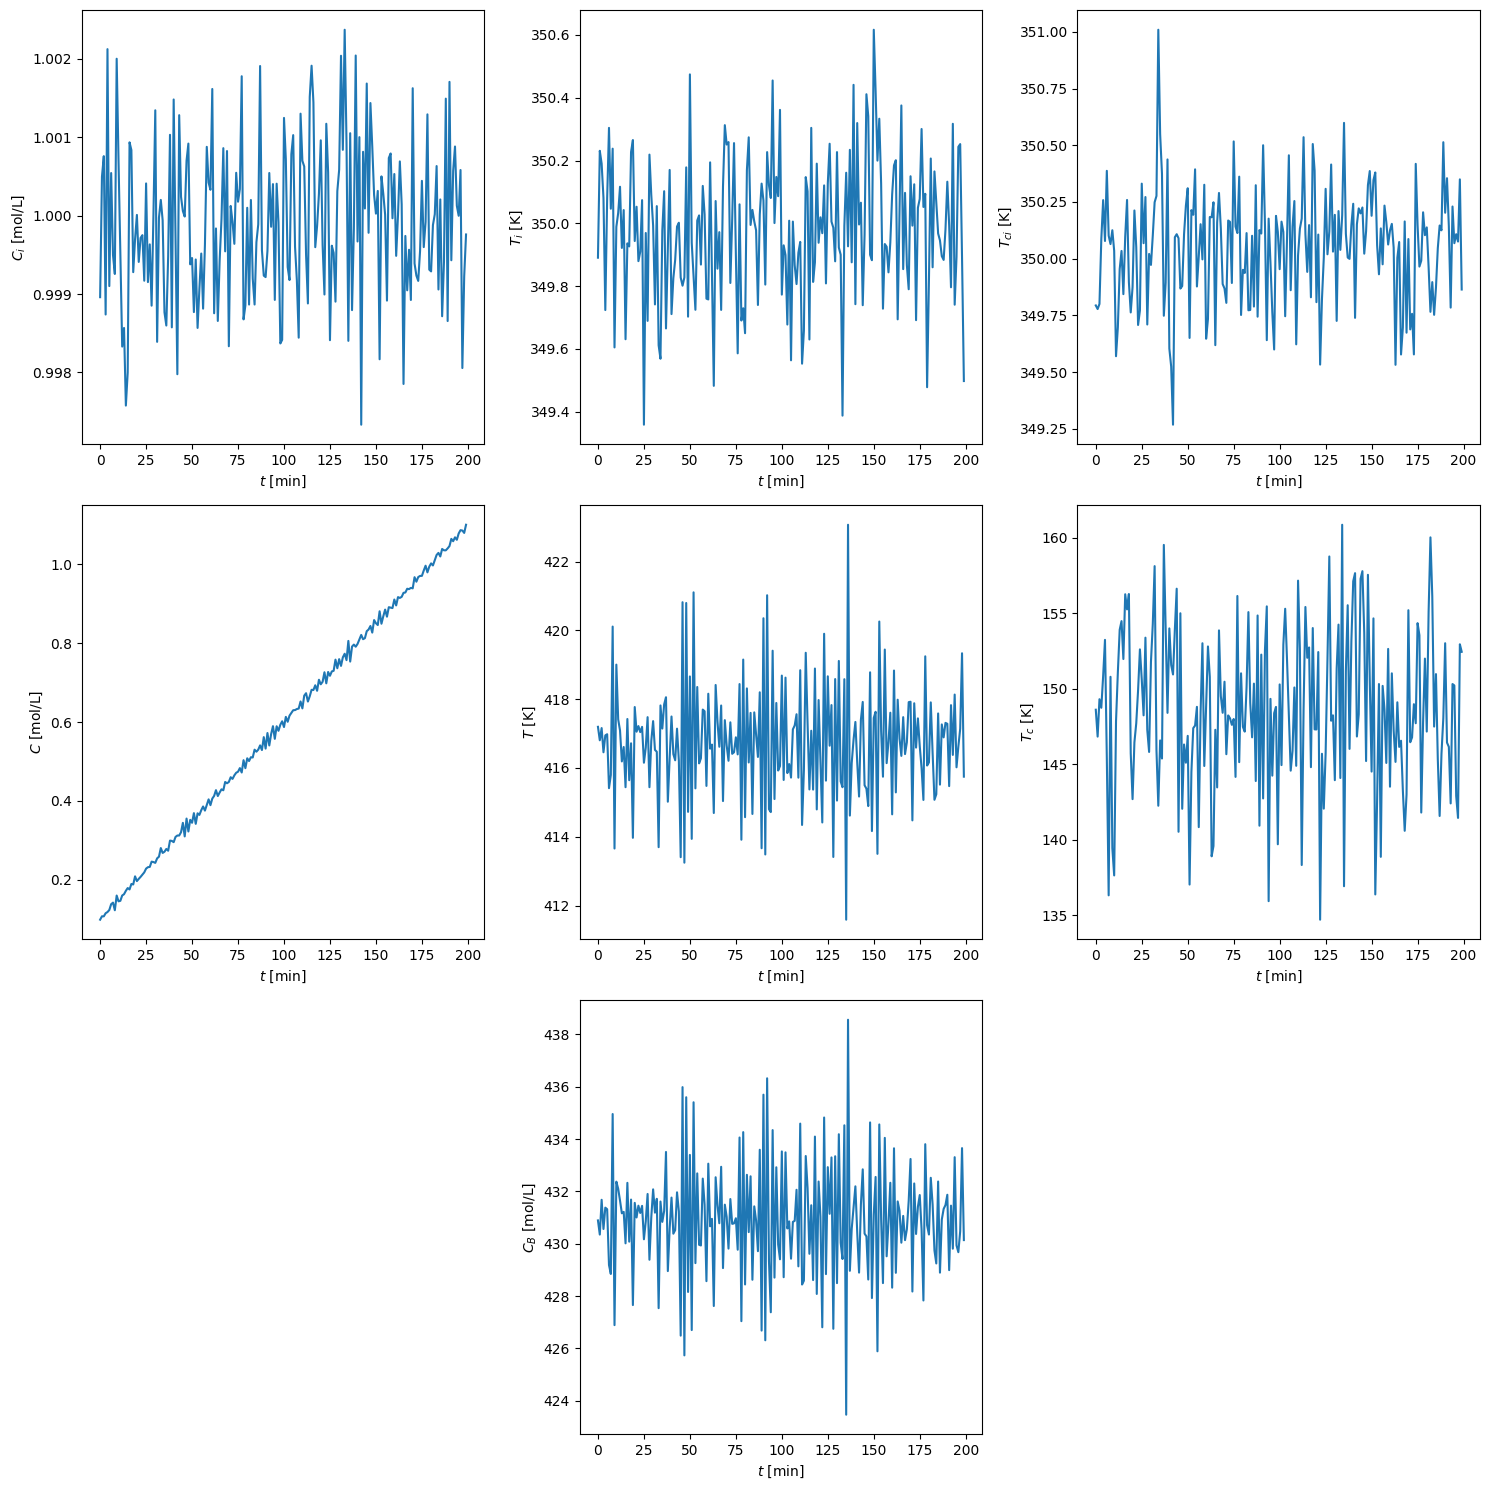

In [41]:
plot_data(5)

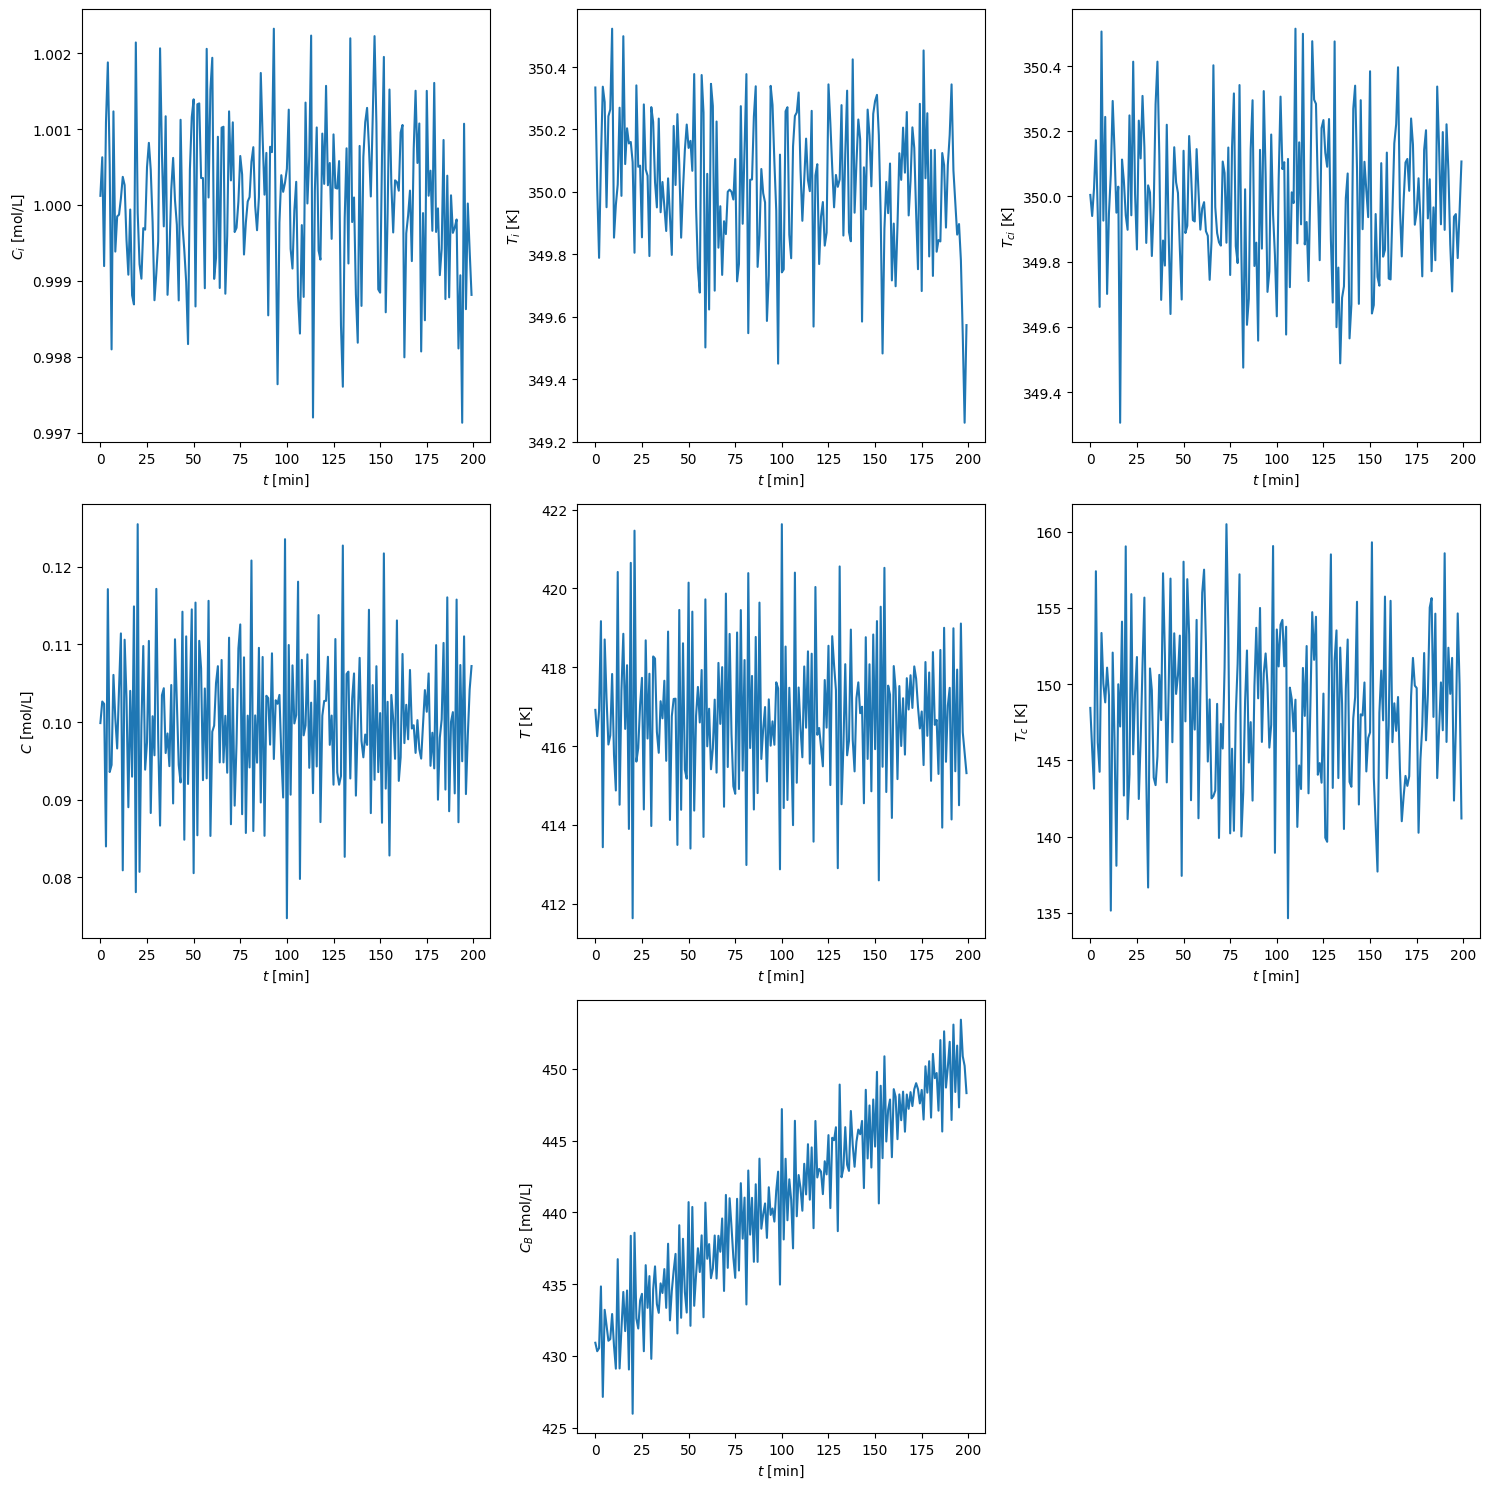

In [48]:
plot_data(6)

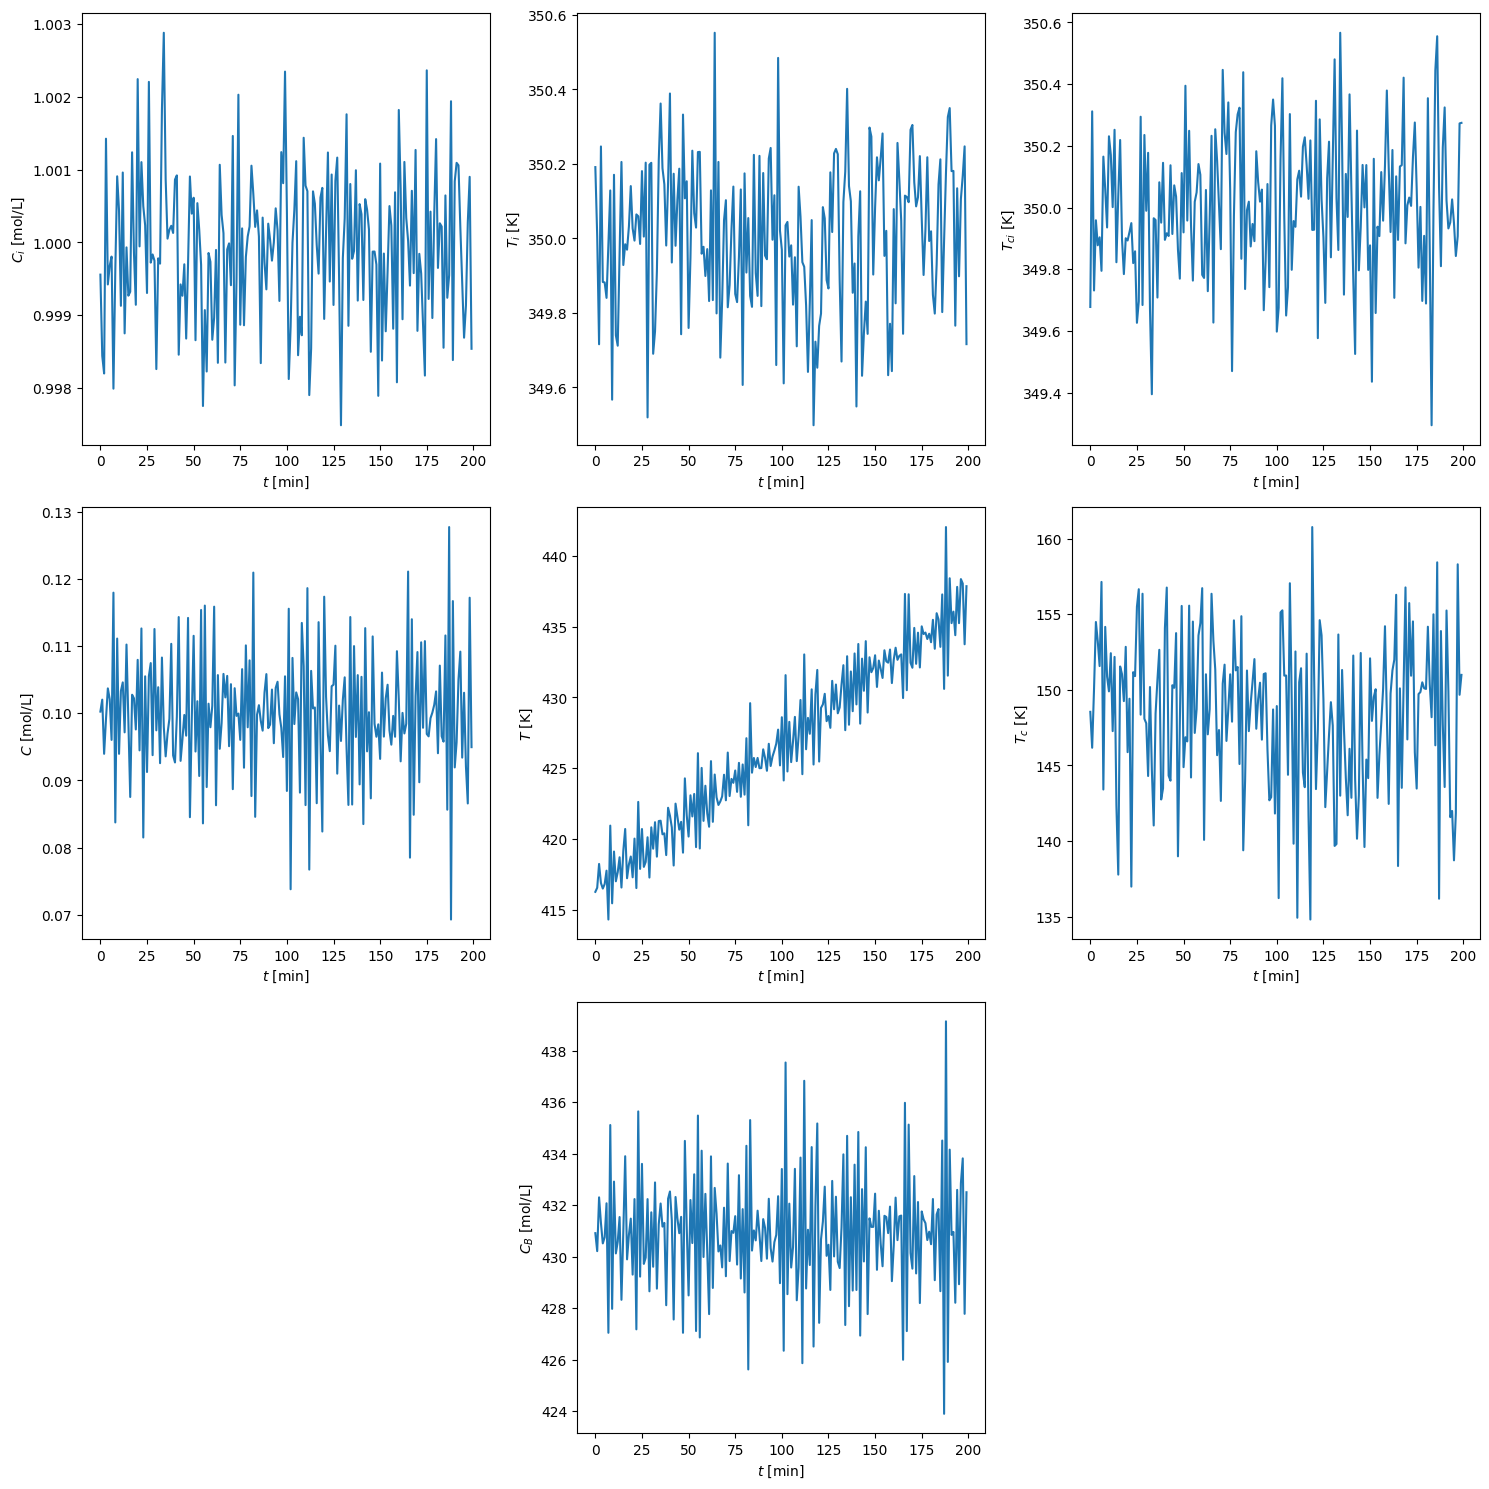

In [42]:
plot_data(7)

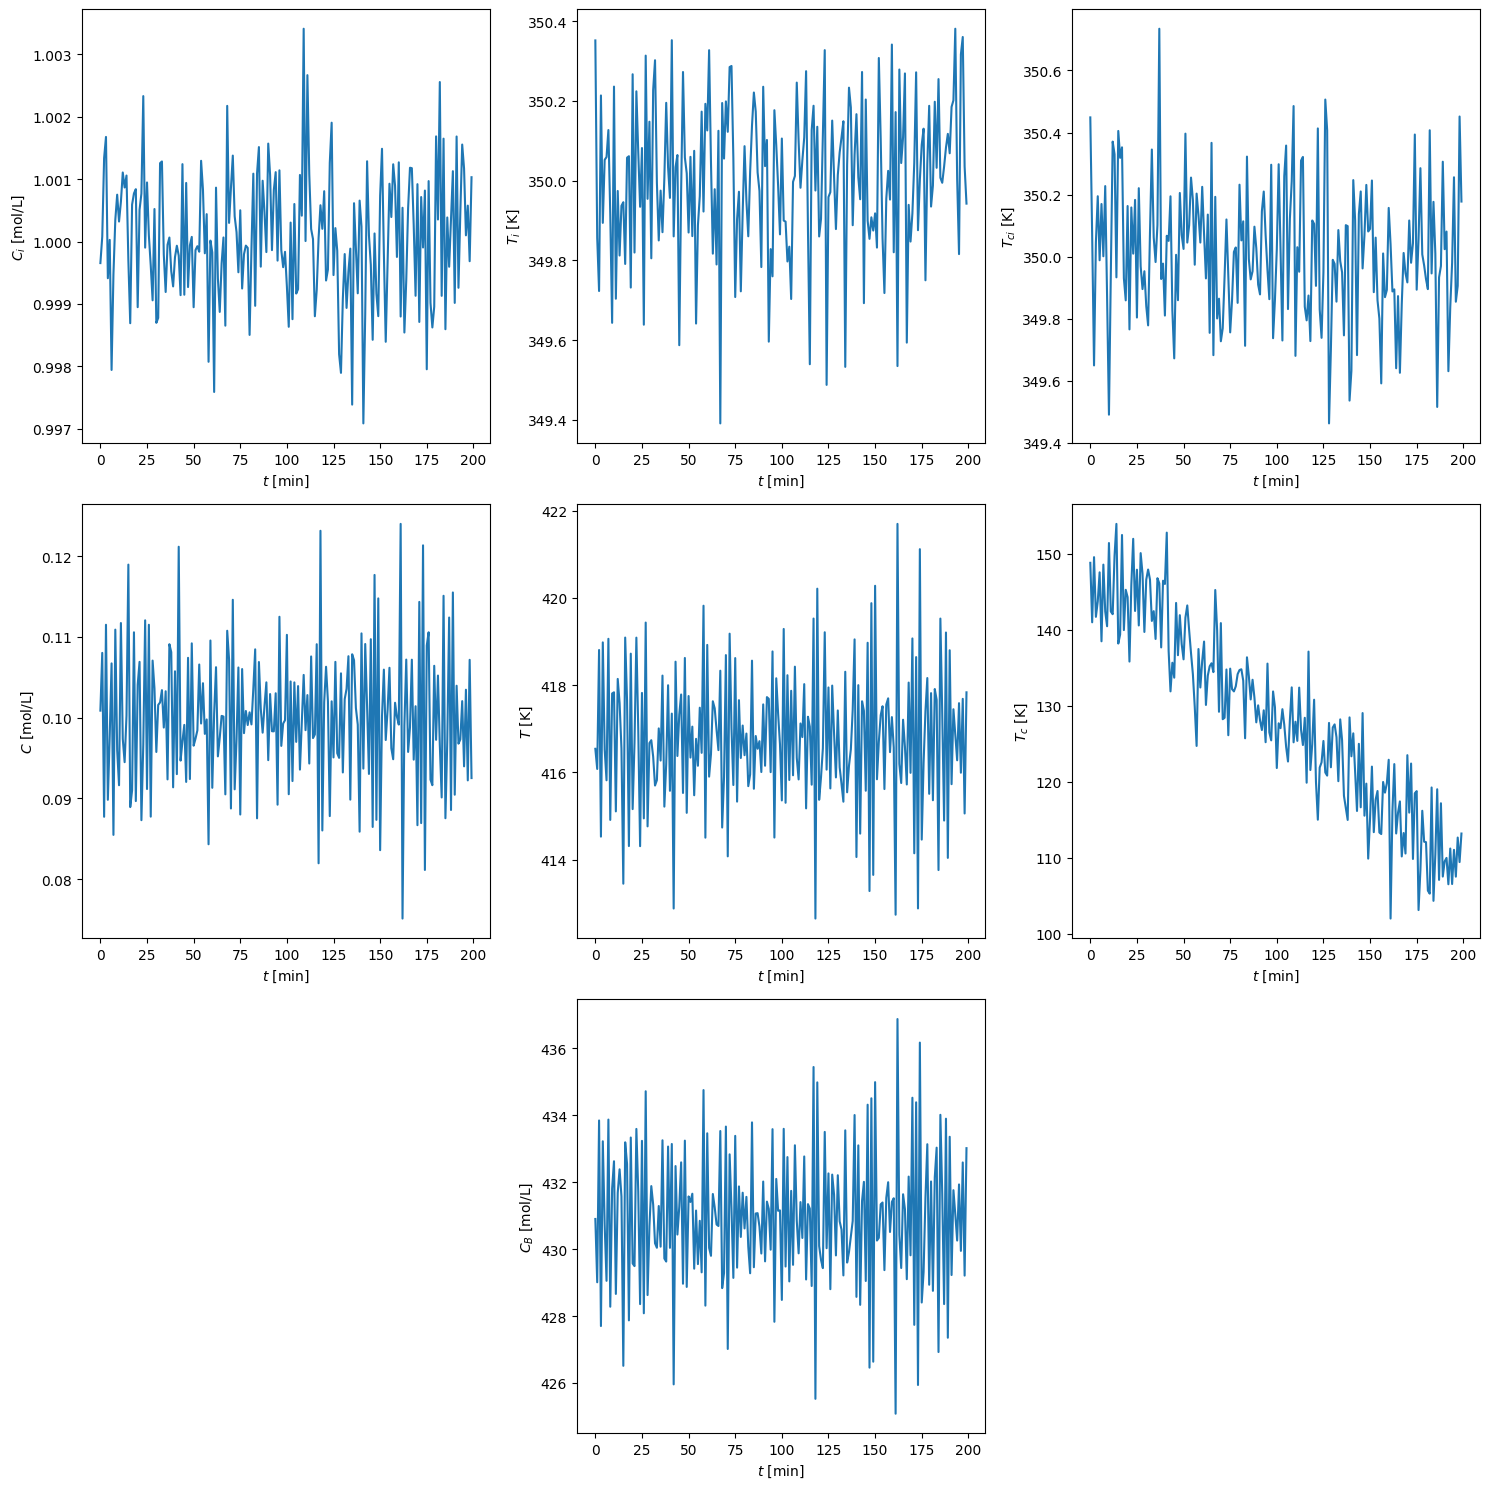

In [47]:
plot_data(8)

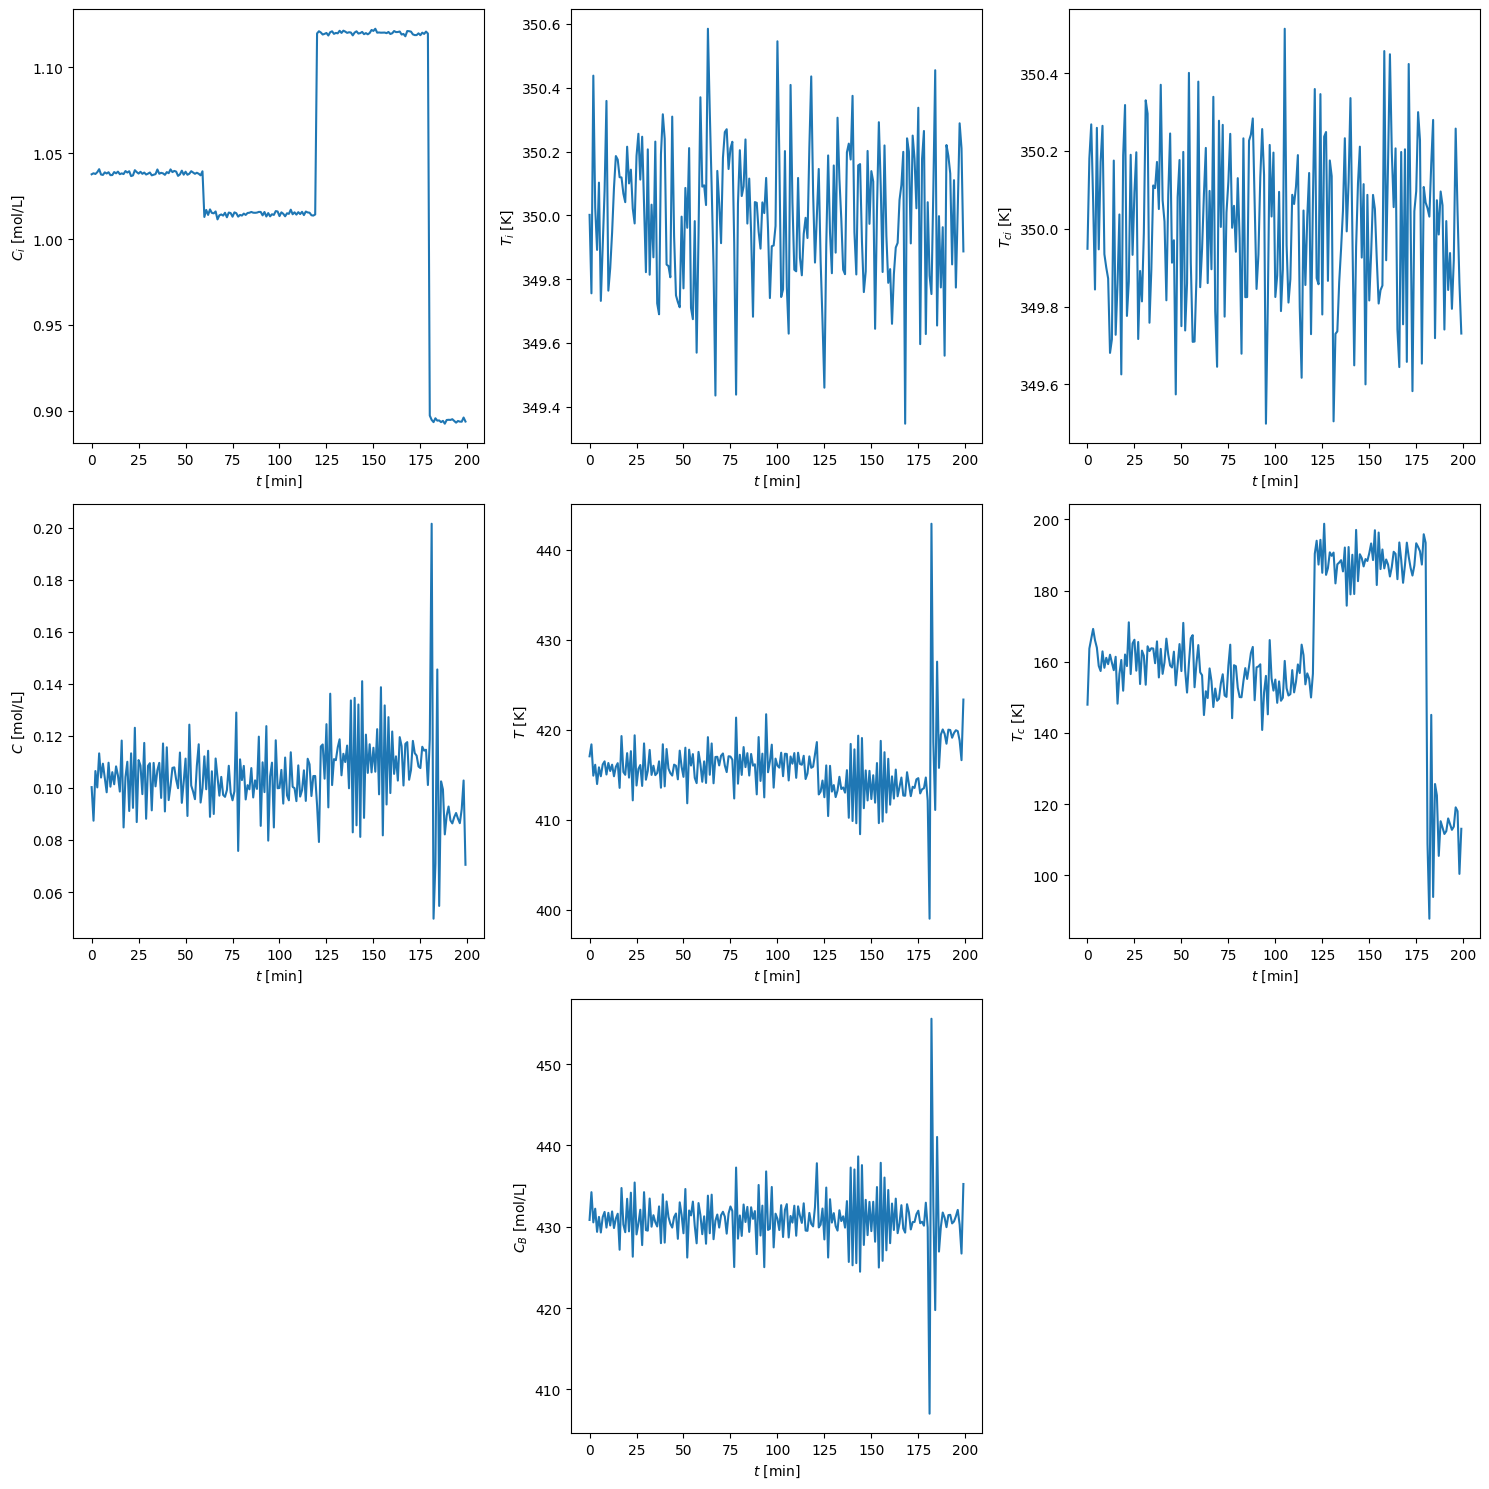

In [43]:
plot_data(9)

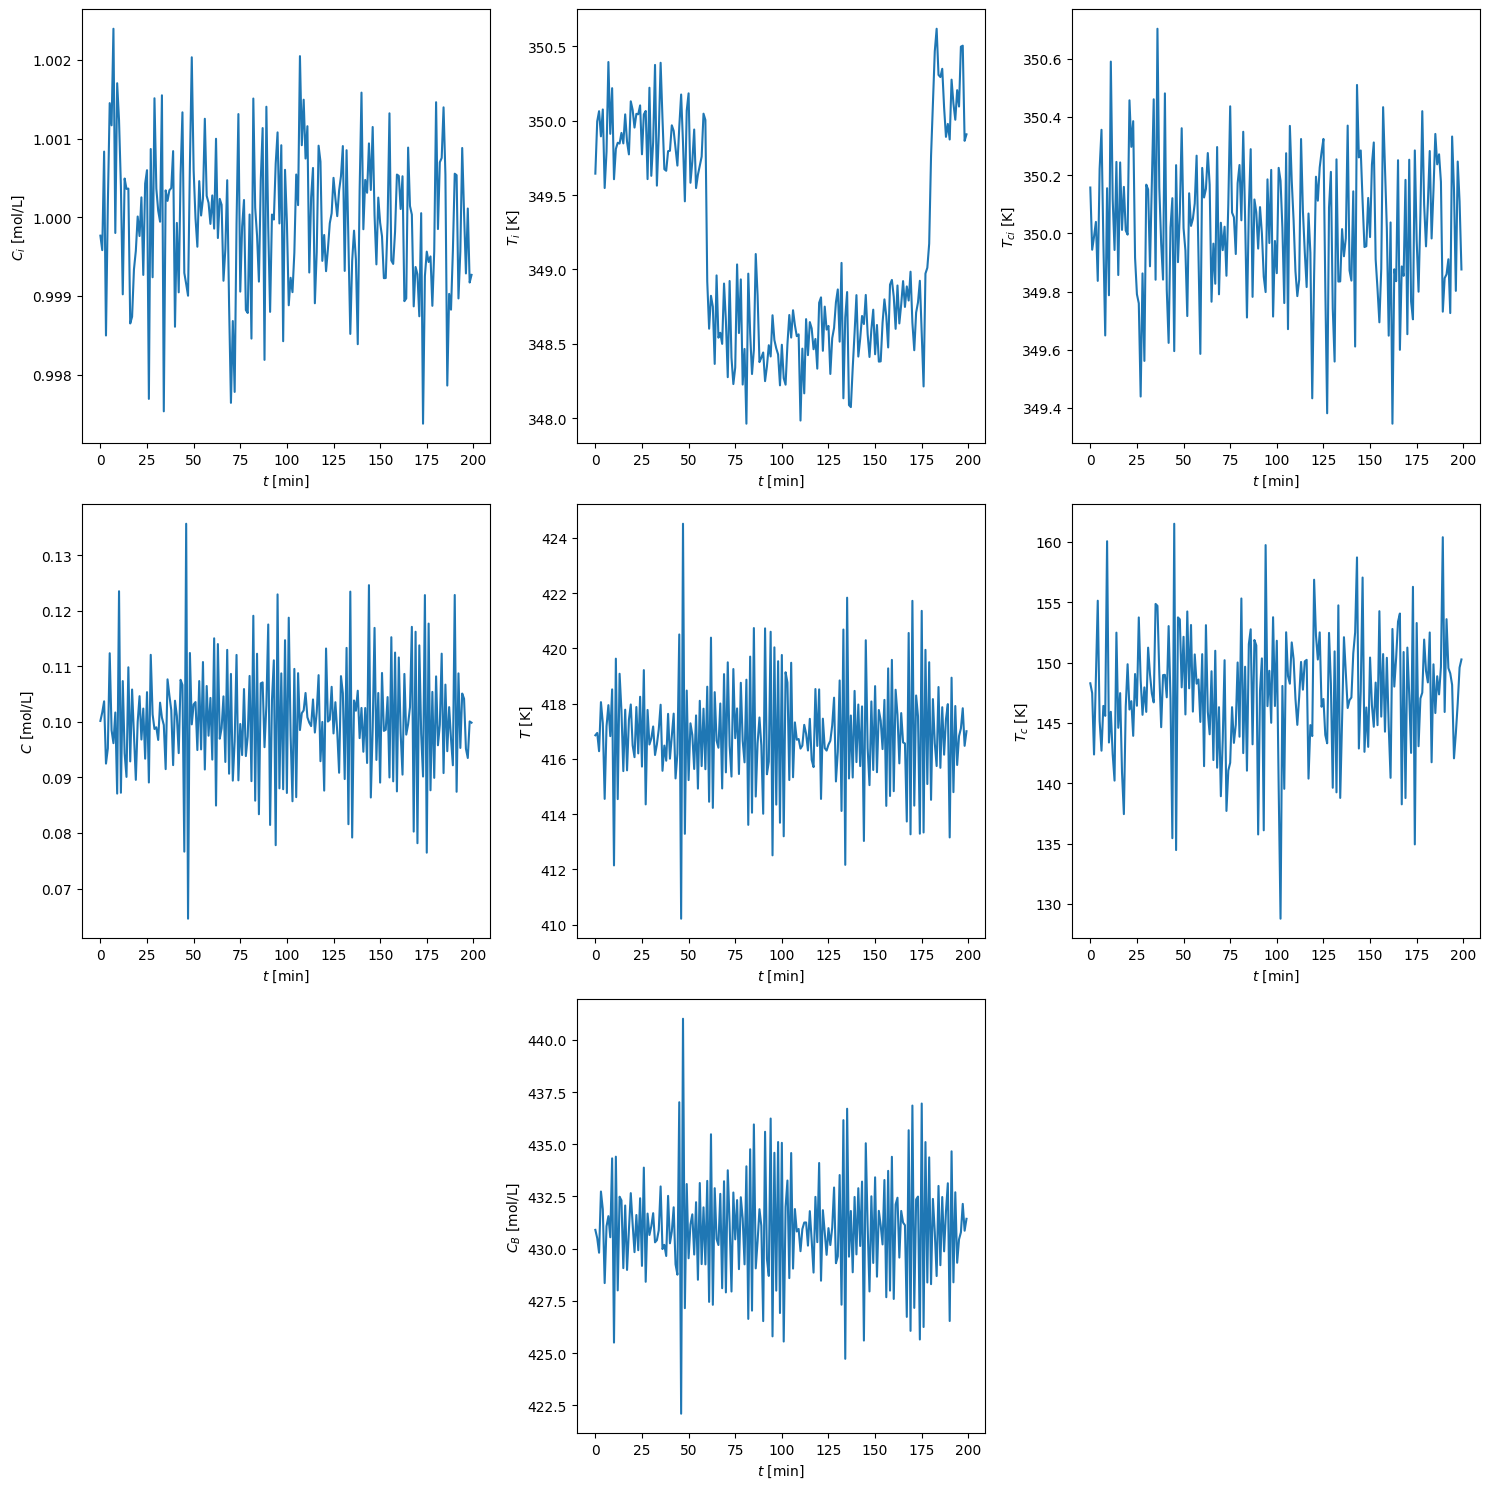

In [44]:
plot_data(10)

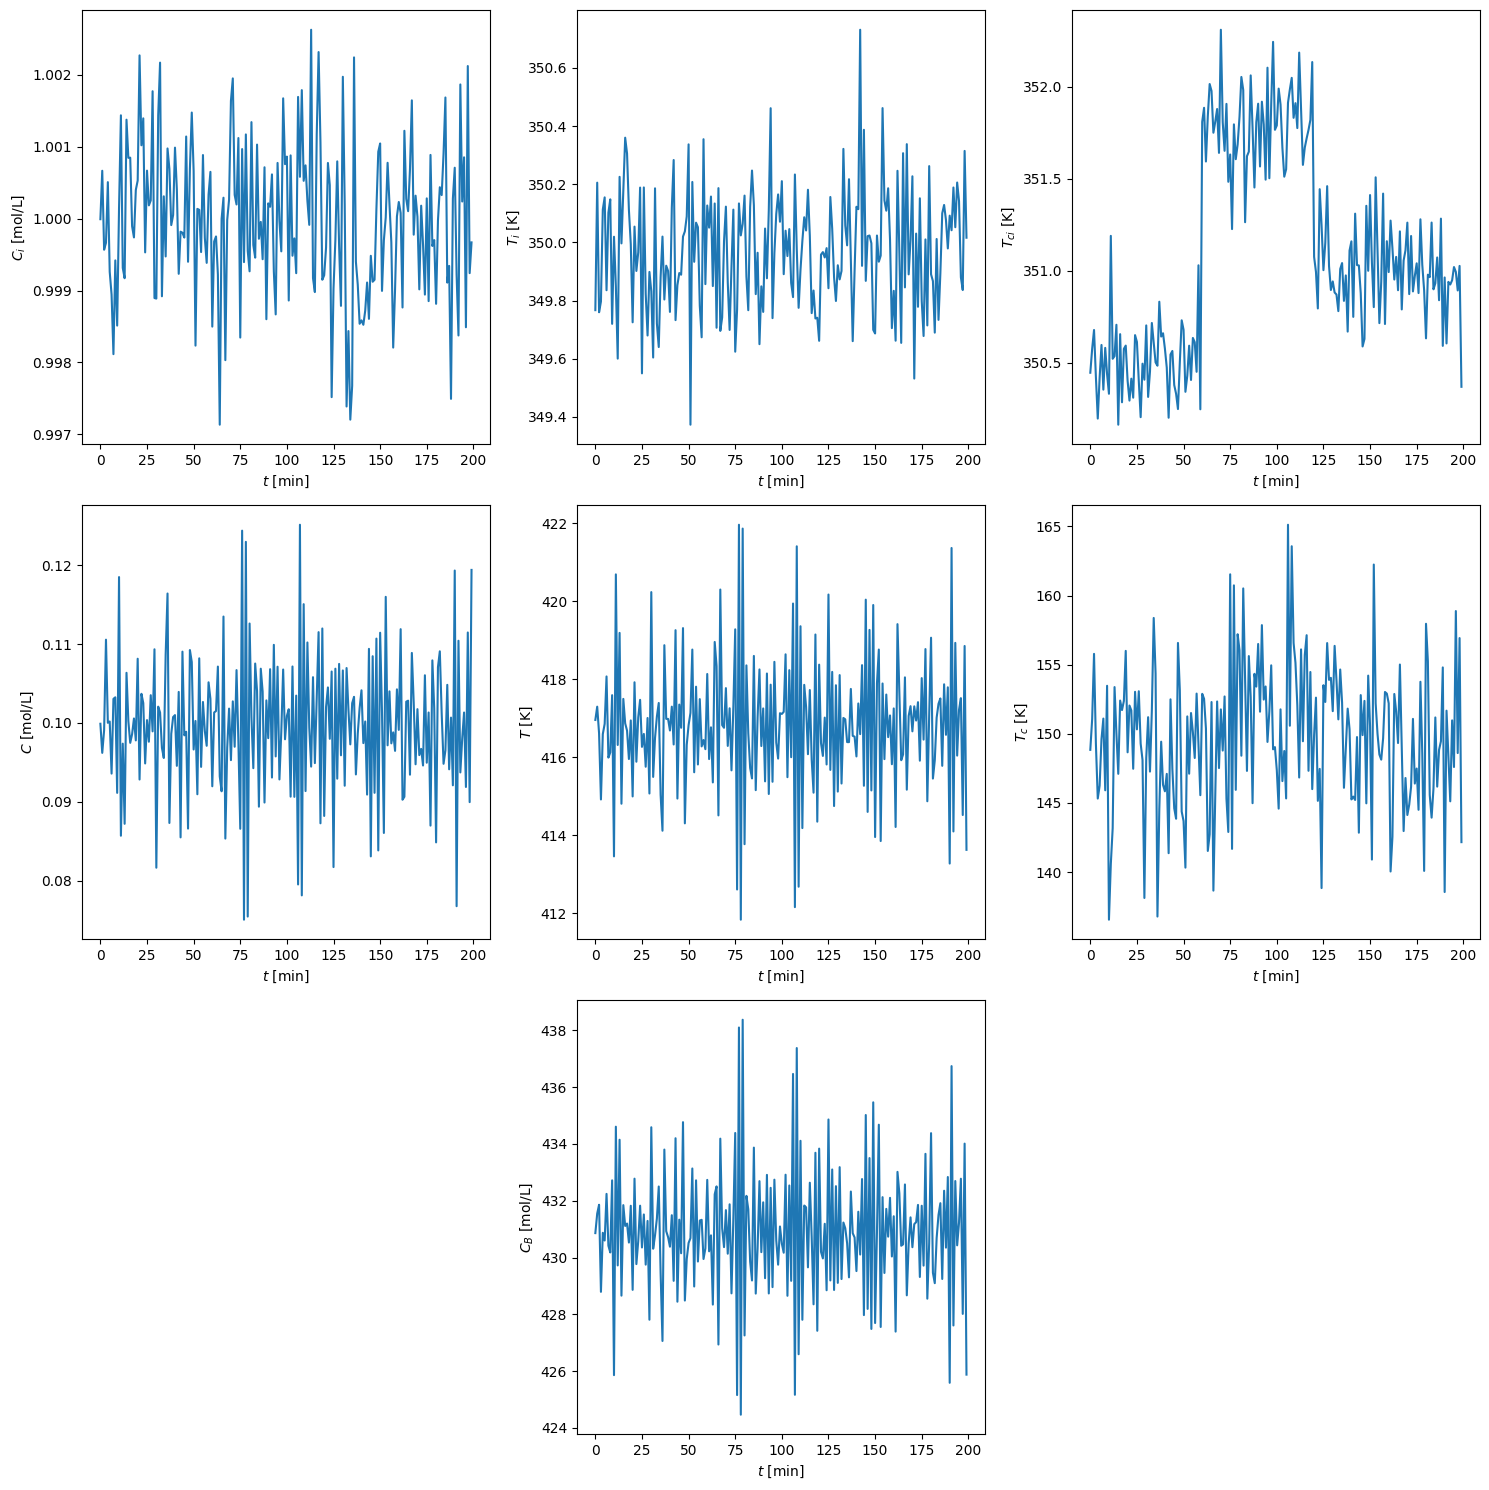

In [46]:
plot_data(11)

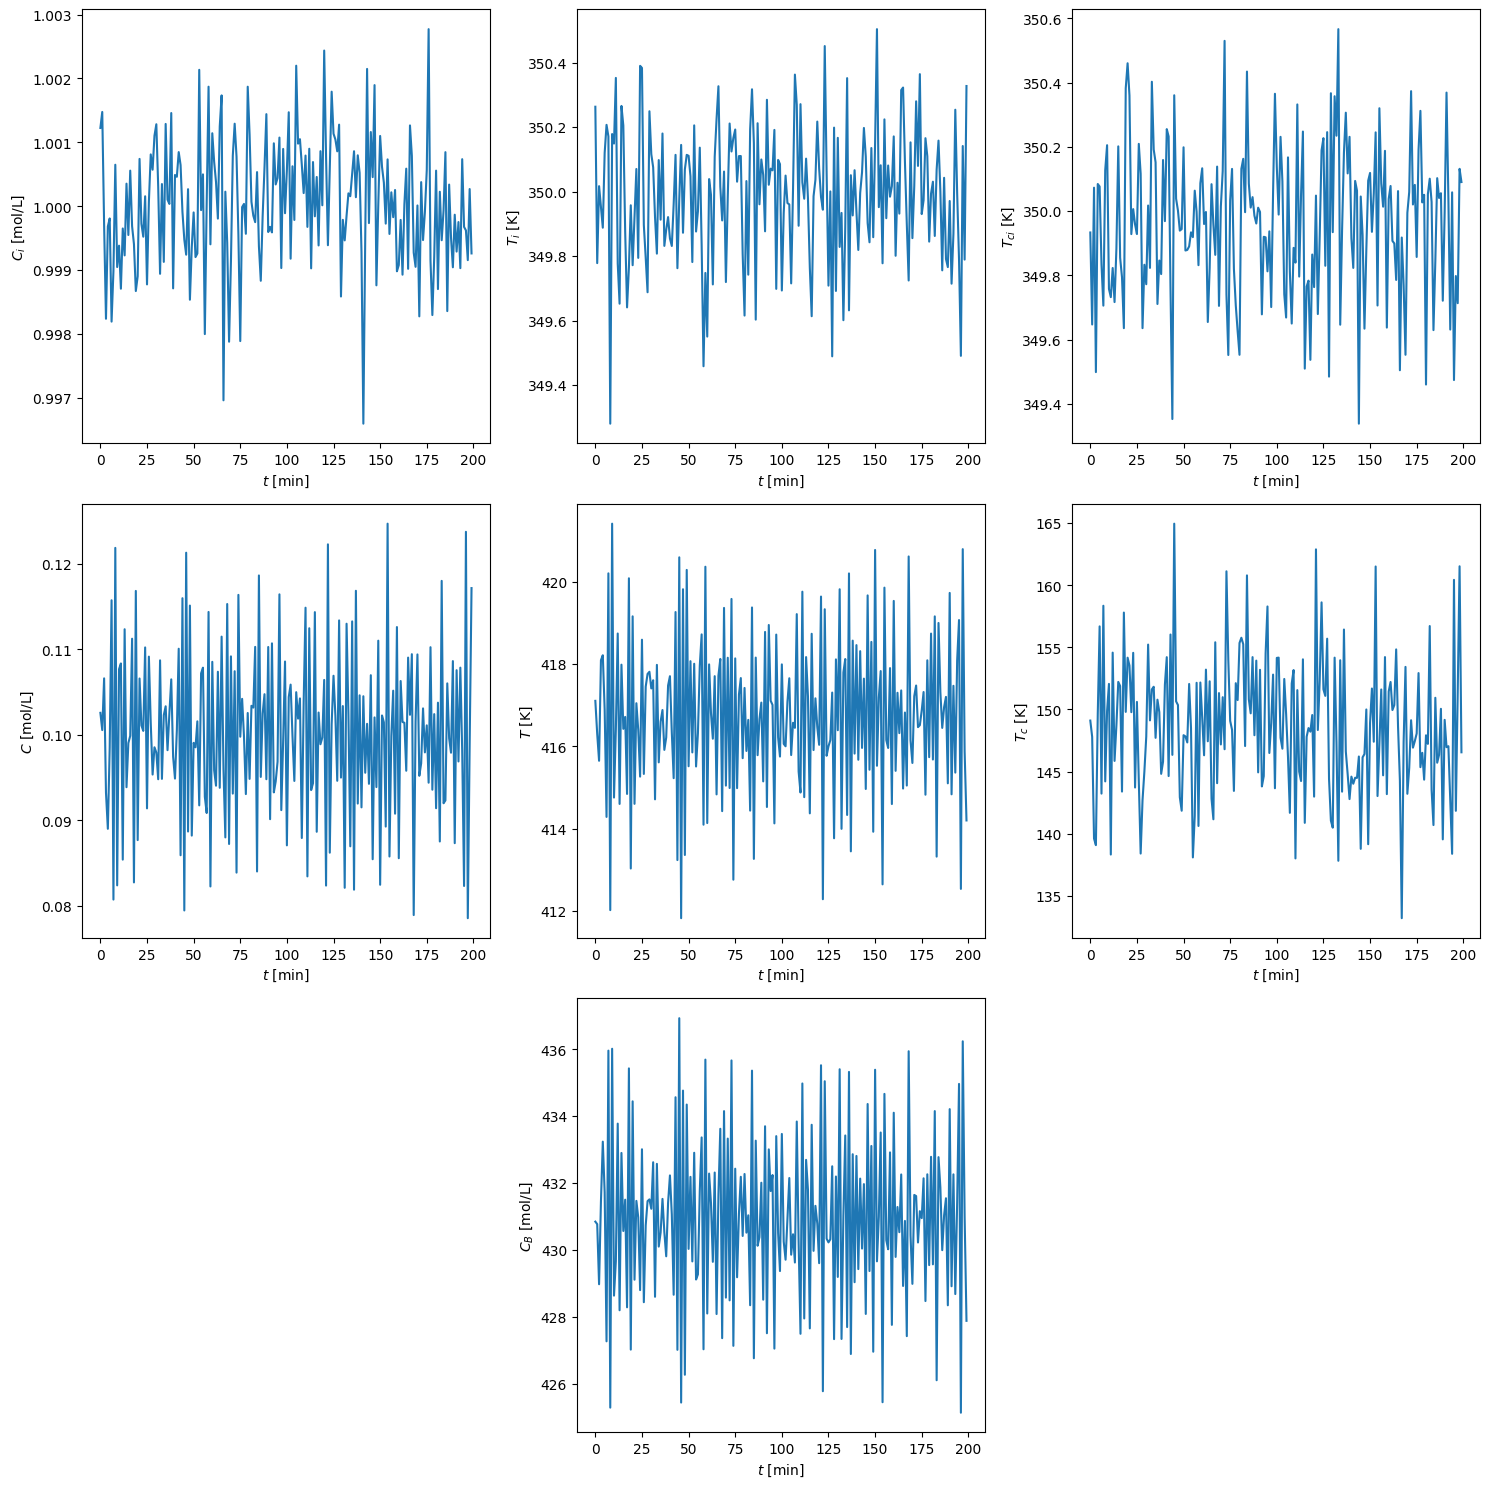

In [45]:
plot_data(12)

### Normalising the signals

In [ ]:
signals = [X[:, i * 200: (i + 1) * 200] for i in range(7)]
for i in range(len(signals)):
    mean, sigma = signals[i].mean(), signals[i].std()
    signals[i] = (signals[i] - mean) / sigma

Xnorm = np.concatenate(signals, axis=1)

### Dimensionality Reduction

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
proj = tsne.fit_transform(Xnorm)
print(proj.shape)


(2860, 2)


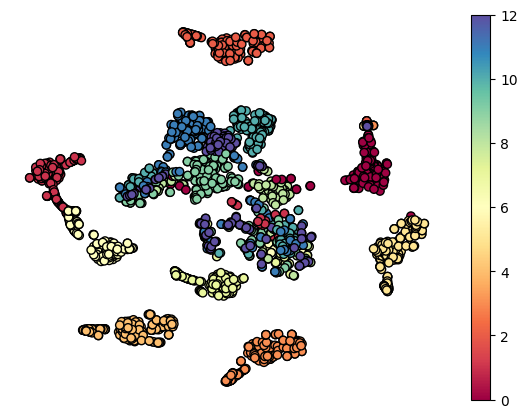

In [ ]:
plt.figure(figsize=(7, 5))
sca = plt.scatter(proj[:, 0], proj[:, 1], c=class_label, cmap=plt.get_cmap('Spectral'), edgecolor='k')
plt.colorbar(sca)
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame({'feature1': proj[:, 0], 'feature2': proj[:, 1], 'class': class_label})
print(df.head())

    feature1   feature2  class
0  41.322632  10.776732    0.0
1  40.282009  12.140834    0.0
2  43.180370  11.824053    0.0
3  42.052227  15.140845    0.0
4  41.748138  16.027851    0.0


In [ ]:
df.to_csv("../proc_data/cstr.csv")